In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install split-folders[full]

In [5]:
import splitfolders
input_folders = '/content/drive/MyDrive/outputfolder1'
splitfolders.ratio(input_folders,output='Trainingir1',seed = 42,ratio= (.8,.1,.1))

Copying files: 120 files [00:41,  2.91 files/s]


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = r'/content/Trainingir1/train'
validation_dir = r'/content/Trainingir1/val'
test_dir =r'/content/Trainingir1/test'

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=2,
        class_mode='binary')

Found 95 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [9]:
print(type(train_generator))
print(len(train_generator))
print(train_generator)

<class 'keras.src.preprocessing.image.DirectoryIterator'>
19


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

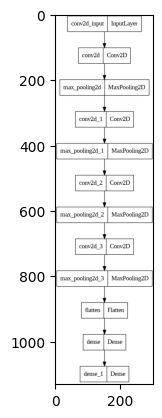

In [13]:
from tensorflow.keras.utils import plot_model

# Plot model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data);

In [14]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/5
5/5 [==============================] - 7s 981ms/step - loss: 0.6932 - acc: 0.5200 - val_loss: 0.5565 - val_acc: 0.7500
Epoch 2/5
5/5 [==============================] - 3s 645ms/step - loss: 0.6722 - acc: 0.6400 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 3/5
5/5 [==============================] - 2s 327ms/step - loss: 0.7151 - acc: 0.5600 - val_loss: 0.6123 - val_acc: 0.6250
Epoch 4/5
5/5 [==============================] - 2s 317ms/step - loss: 0.6983 - acc: 0.4800 - val_loss: 0.6147 - val_acc: 0.7500
Epoch 5/5
5/5 [==============================] - 2s 335ms/step - loss: 0.6688 - acc: 0.6000 - val_loss: 0.6301 - val_acc: 0.6250


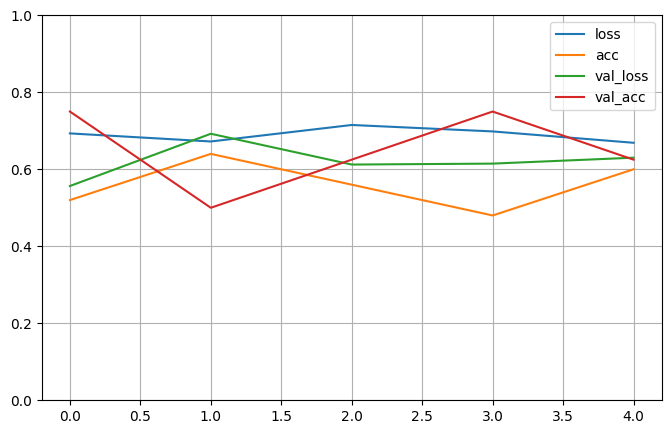

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=2,
        class_mode='binary')

Found 14 images belonging to 2 classes.


In [19]:
model.evaluate(test_generator, steps=2)

2/2 [==============================] - 0s 35ms/step - loss: 0.5789 - acc: 0.7500


[0.5788743495941162, 0.75]